In [4]:
import warnings
warnings.filterwarnings("ignore")

#### Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Read Dataset 

In [6]:
country_df = pd.read_csv(r'F:\PGD_UpGrad\Machine_Learning_1\Clustering and PCA Assignment\Data\Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Data Analysis and cleaning

In [7]:
country_df.shape

(167, 10)

In [8]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


Checking for the null/nan value

In [9]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In most of the columns there is percentage information with GDP which cannot give sufficient information cause many country have high GDP and same percentage of `Export`, `Health`, `Import` so we have convert those values into the actual values.

In [10]:
country_df.exports = (country_df.exports * country_df.gdpp)/100
country_df.health = (country_df.health * country_df.gdpp)/100
country_df.imports = (country_df.imports * country_df.gdpp)/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Check correlation between every column

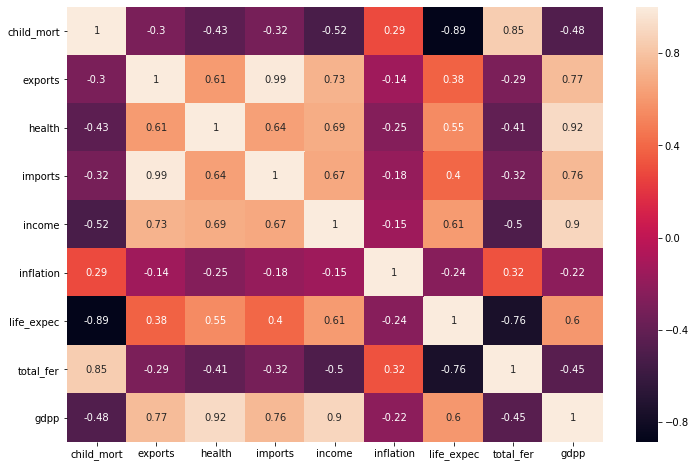

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(country_df.corr(), annot=True)
plt.show()

From above plot we can see that so almost every columns is highly correlated with each other. so we can apply PCA to get reduced data set 

#### Check for the outliers in the data 

In [12]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Boxlpot for every columns for checking the outliers

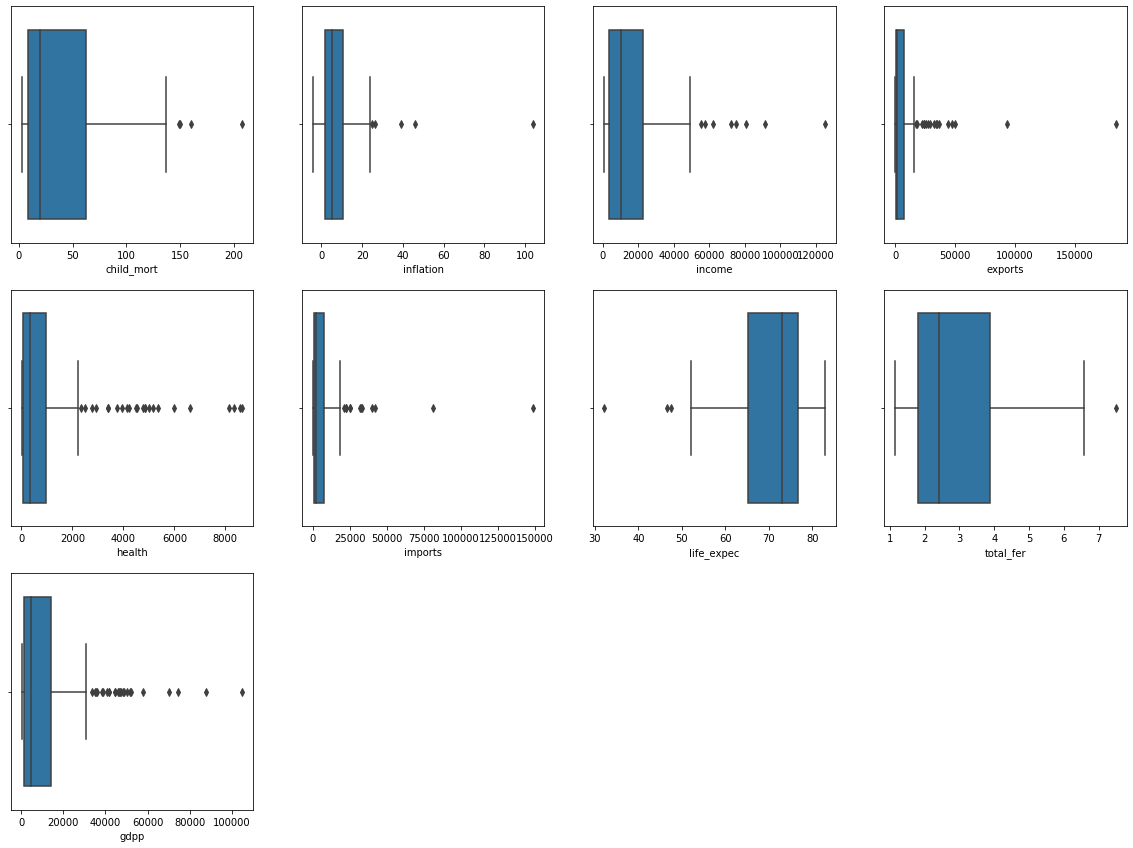

In [13]:
fig=plt.figure(figsize=(20, 20))

plt.subplot(441)
sns.boxplot(country_df.child_mort)
plt.subplot(442)
sns.boxplot(country_df.inflation)
plt.subplot(443)
sns.boxplot(country_df.income)
plt.subplot(444)
sns.boxplot(country_df.exports)
plt.subplot(445)
sns.boxplot(country_df.health)
plt.subplot(446)
sns.boxplot(country_df.imports)
plt.subplot(447)
sns.boxplot(country_df.life_expec)
plt.subplot(448)
sns.boxplot(country_df.total_fer)
plt.subplot(449)
sns.boxplot(country_df.gdpp)
plt.show()

-  From above boxplots we see that there is outliers in each columns but if we process the outplier treatent then we loss most of the information, so we can remove the outlier after applying PCA.

In [14]:
country_df_mod = country_df.drop("country", axis=1)

#### Standardize the data befor applying the PCA

In [15]:
scalar = StandardScaler()

In [16]:
country_df_scaled = country_df_mod.copy()

In [17]:
country_df_scaled = scalar.fit_transform(country_df_scaled)
country_df_scaled[:5,:]

array([[ 1.29153238, -0.4110113 , -0.56503989, -0.4322755 , -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, -0.31367739, -0.3753689 ,
        -0.31234747,  0.64786643, -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, -0.35372048, -0.22084447,
         0.78927429,  0.67042323, -0.0384044 , -0.46537561],
       [ 2.00780766, -0.29137452, -0.53236319, -0.34595254, -0.58504345,
         1.38705353, -1.17923442,  2.12815103, -0.51626829],
       [-0.69563412, -0.10433146, -0.17877054,  0.04073499,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633, -0.04181713]])

### Apply PCA to the dataframe

In [18]:
pca = PCA(random_state=42)

In [19]:
pca.fit(country_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [21]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

#### Making scree plot of variance ratio

In [22]:
variance_cumsum = np.cumsum(pca.explained_variance_ratio_)

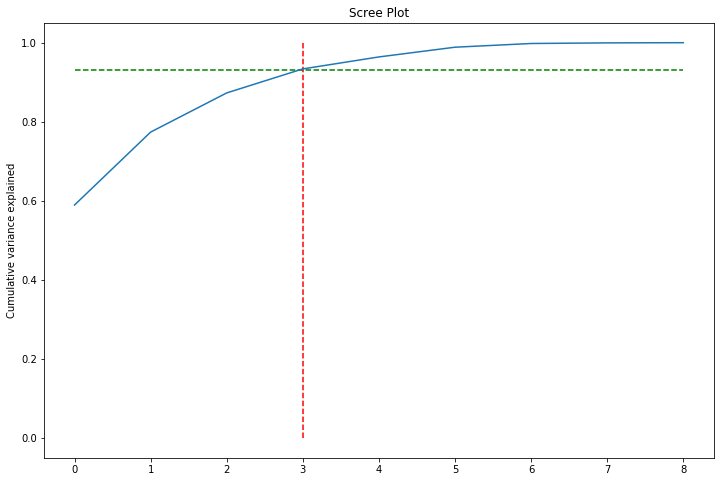

In [23]:
fig = plt.figure(figsize=(12,8))
plt.vlines(x=3, ymax=1, ymin=0, colors='r', linestyles='--')
plt.hlines(y=0.93, xmax=8, xmin=0, colors='g', linestyles='--')
plt.plot(variance_cumsum)
plt.title("Scree Plot")
plt.ylabel("Cumulative variance explained")
plt.show()

We can see that around 93% of variance explained by 3 varibale for lets run the PCA using only 3 variables

#### Perform PCA on three components

In [24]:
from sklearn.decomposition import IncrementalPCA

In [25]:
pca_final = IncrementalPCA(n_components=3) 

In [26]:
country_df_pca = pca_final.fit_transform(country_df_scaled)

In [27]:
country_df_pca.shape

(167, 3)

#### Check correlation matrix of generated data frame after applying PCA 

In [28]:
corrmat = np.corrcoef(country_df_pca.transpose())

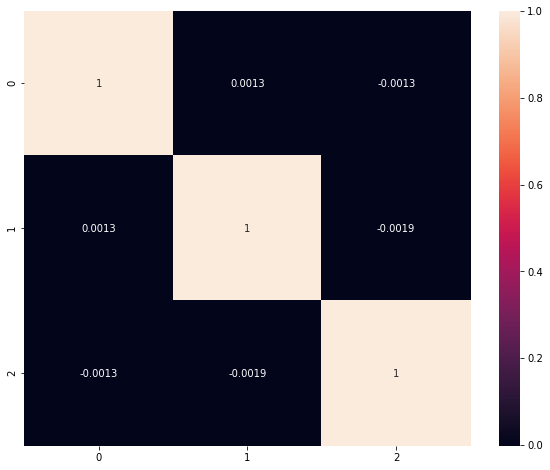

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(corrmat, annot=True)
plt.show()

In [30]:
country_df_pca = pd.DataFrame(country_df_pca, columns=["PC1", "PC2", "PC3"])
country_df_pca.insert(0,"country", country_df.country)
country_df_pca.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [31]:
country_df_pca.describe()

,PC1,PC2,PC3
count,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.127373e-17,1.329608e-18,2.925139e-17
std,2.310042e+00,1.292295e+00,9.467202e-01
min,-3.944960e+00,-1.696969e+00,-1.791111e+00
25%,-1.446673e+00,-9.783466e-01,-3.974440e-01
50%,-3.567044e-01,-3.984503e-01,-1.740323e-01
75%,8.505467e-01,6.782430e-01,2.604698e-01
max,1.264435e+01,8.265266e+00,7.866491e+00


### Outlier treatment

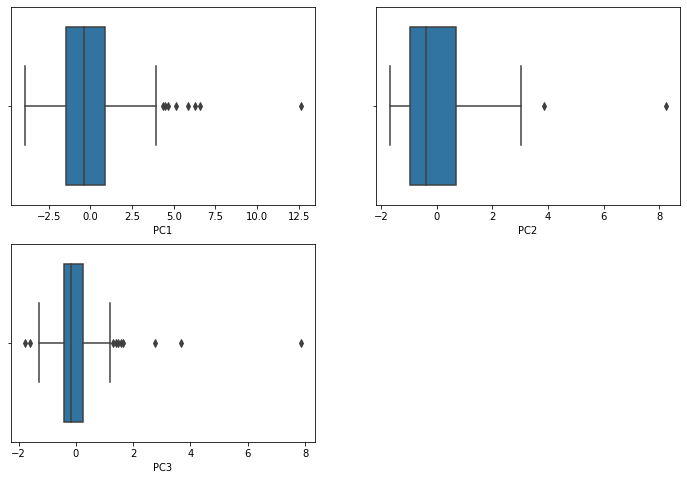

In [32]:
fig=plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(country_df_pca.PC1)
plt.subplot(222)
sns.boxplot(country_df_pca.PC2)
plt.subplot(223)
sns.boxplot(country_df_pca.PC3)

plt.show()

We can see that there is some outlier after applying the PCA so lets remove those

In [33]:
Q1 = country_df_pca.PC1.quantile(0.05)
Q3 = country_df_pca.PC1.quantile(0.95)
IQR = Q3 - Q1
country_df_pca = country_df_pca[(country_df_pca.PC1 >= Q1) & (country_df_pca.PC1 <= Q3)]

Q1 = country_df_pca.PC2.quantile(0.05)
Q3 = country_df_pca.PC2.quantile(0.95)
IQR = Q3 - Q1
country_df_pca = country_df_pca[(country_df_pca.PC2 >= Q1) & (country_df_pca.PC2 <= Q3)]

Q1 = country_df_pca.PC3.quantile(0.05)
Q3 = country_df_pca.PC3.quantile(0.95)
IQR = Q3 - Q1
country_df_pca = country_df_pca[(country_df_pca.PC3 >= Q1) & (country_df_pca.PC3 <= Q3)]

In [34]:
country_df_pca.shape

(119, 4)

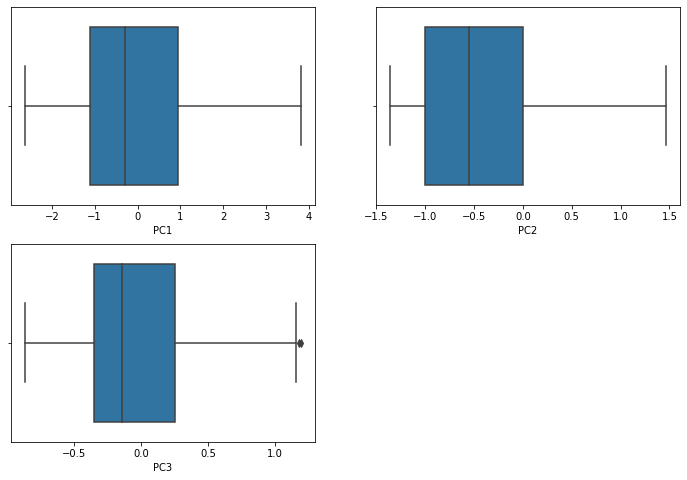

In [35]:
fig=plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(country_df_pca.PC1)
plt.subplot(222)
sns.boxplot(country_df_pca.PC2)
plt.subplot(223)
sns.boxplot(country_df_pca.PC3)

plt.show()

After removing the outliers e can see that normal distribution of the data

#### Scatterplot for analysing the first two principle components

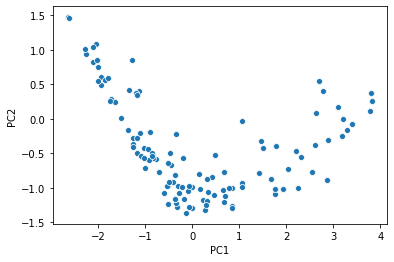

In [36]:
sns.scatterplot(x="PC1", y="PC2", data=country_df_pca)
plt.show()

### Apply Hopkins statistics
-  It check data freame is suitable or not for the clustering

In [37]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [38]:
hopkins(country_df_pca.drop("country", axis=1))

0.7742504352620785

### Clustering

-  Check for the optimal number of cluster using `elbow curve` and `Silhouette Analysis`

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

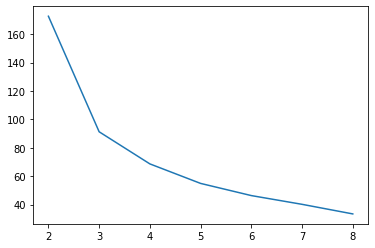

In [40]:
# elbow-curve / Sum of squared disances
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_pca.drop("country", axis=1))
    
    ssd.append(kmeans.inertia_)

# plot the ssd 
sns.lineplot(y = ssd, x=range_n_clusters)    
plt.show()

### Using Silhouette Analysis

In [41]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_pca.drop("country", axis=1))
    
    cluster_lable = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_pca.drop("country", axis=1), cluster_lable)
    print("For n_clusters = {0}, the silhouette score is = {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is = 0.4873400103541441
For n_clusters = 3, the silhouette score is = 0.4639771456218248
For n_clusters = 4, the silhouette score is = 0.3969262688115082
For n_clusters = 5, the silhouette score is = 0.36577974095653376
For n_clusters = 6, the silhouette score is = 0.3616166386353317
For n_clusters = 7, the silhouette score is = 0.3685768915818518
For n_clusters = 8, the silhouette score is = 0.37406520851800357


From the silhouette analysis and elbow curve we can see that after 5 cluster score is decrese so drastically so we choose 5 clusters for K-mean  

In [42]:
country_df_kmean = country_df_pca
country_df_kmean = country_df_kmean.drop("country", axis=1)
country_df_kmean.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
2,-0.457626,-0.673301,0.961867
4,0.649849,-1.024374,-0.250103
6,-0.332692,-1.274517,0.176636
7,3.180362,-0.250785,-0.116877


#### Apply K-Mean Clustering 

In [43]:
model_kmean_5 = KMeans(n_clusters=5, max_iter=100)
model_kmean_5.fit(country_df_kmean)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
model_kmean_5.labels_

array([0, 3, 1, 3, 2, 2, 3, 1, 1, 4, 1, 3, 3, 4, 4, 0, 3, 3, 4, 2, 4, 3,
       3, 3, 0, 0, 1, 2, 1, 3, 3, 4, 3, 0, 1, 4, 2, 2, 0, 0, 3, 2, 0, 1,
       3, 4, 4, 1, 2, 4, 4, 3, 0, 1, 2, 3, 2, 3, 3, 0, 2, 4, 0, 1, 0, 3,
       1, 0, 3, 3, 2, 0, 3, 4, 3, 4, 4, 0, 4, 2, 1, 0, 3, 3, 3, 4, 1, 1,
       3, 3, 0, 4, 1, 1, 1, 4, 0, 1, 1, 3, 0, 3, 2, 4, 0, 4, 3, 3, 4, 0,
       3, 2, 2, 2, 3, 4, 4, 3, 0])

In [45]:
country_list = country_df_pca.country

In [46]:
country_df = country_df.loc[country_df["country"].isin(country_list)]
country_df.shape

(119, 10)

In [47]:
country_df["cluster_id"] = model_kmean_5.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,3
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,2


-  After Applying the clustering if we observe the important factors like `Child_mort`, `gdpp`, `income`, `health` and check which cluster need to focus on.

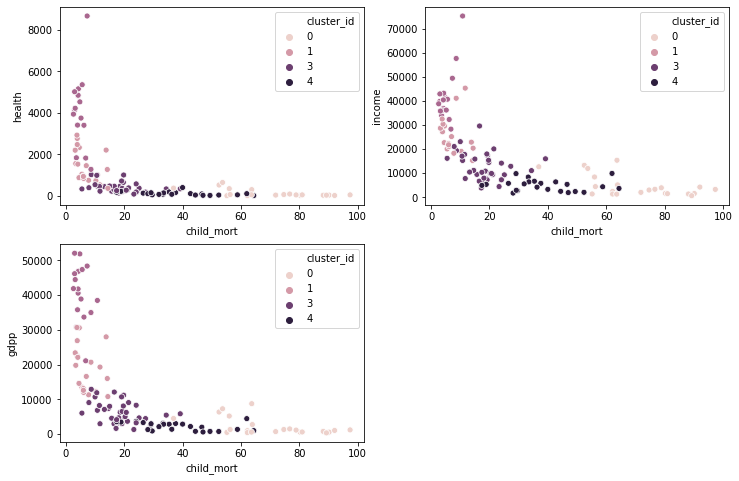

In [48]:
fig=plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.scatterplot(x="child_mort",y="health", hue="cluster_id", data=country_df)
plt.subplot(222)
sns.scatterplot(x="child_mort",y="income", hue="cluster_id", data=country_df)
plt.subplot(223)
sns.scatterplot(x="child_mort",y="gdpp", hue="cluster_id", data=country_df)

plt.show()

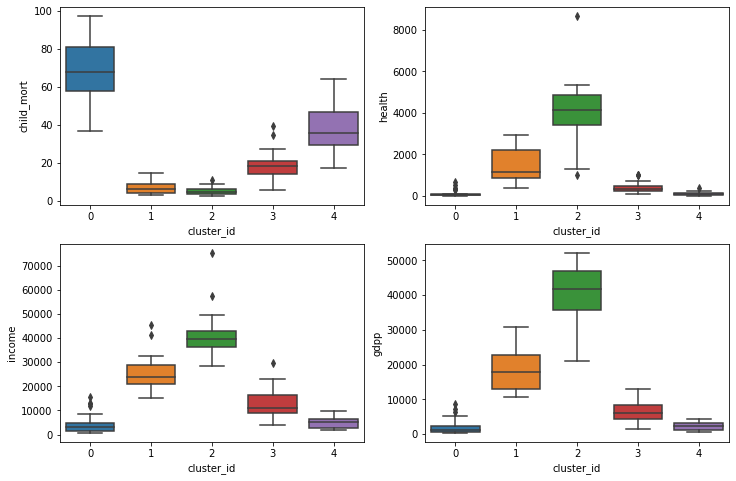

In [49]:
fig=plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(x='cluster_id', y='child_mort', data=country_df)
plt.subplot(222)
sns.boxplot(x='cluster_id', y='health', data=country_df)
plt.subplot(223)
sns.boxplot(x='cluster_id', y='income', data=country_df)
plt.subplot(224)
sns.boxplot(x='cluster_id', y='gdpp', data=country_df)
plt.show()


In [50]:
country_df_kmean["cluster_id"] = model_kmean_5.labels_
country_df_kmean.head()

,PC1,PC2,PC3,cluster_id
0,-2.637442,1.469038,-0.541359,0
2,-0.457626,-0.673301,0.961867,3
4,0.649849,-1.024374,-0.250103,1
6,-0.332692,-1.274517,0.176636,3
7,3.180362,-0.250785,-0.116877,2


#### Plot scatterplot of each principle compenent with cluster ID

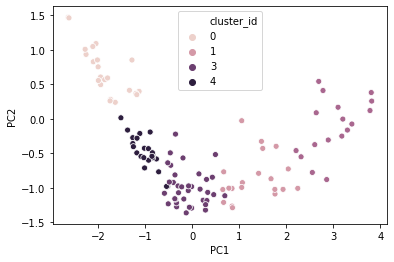

In [51]:
sns.scatterplot(x="PC1",y="PC2", hue="cluster_id", data=country_df_kmean)
plt.show()

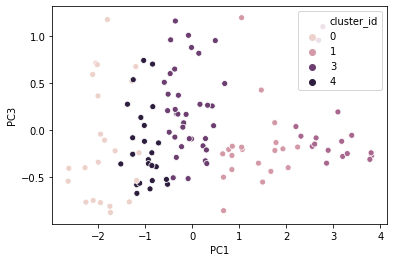

In [52]:
sns.scatterplot(x="PC1",y="PC3", hue="cluster_id", data=country_df_kmean)
plt.show()

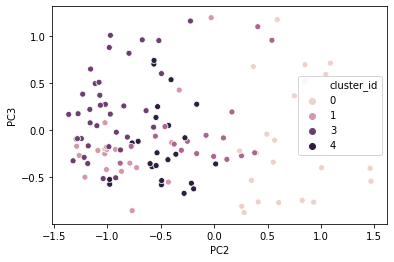

In [53]:
sns.scatterplot(x="PC2",y="PC3", hue="cluster_id", data=country_df_kmean)
plt.show()

#### Obeservations After applying K-Mean Clustering
-  We can see that cluser 0, cluster 3 has high child mort rate and low health quality, income and GDP per capita
-  Cluster 4 is also not good but it has slightly less child mort rate as compare to cluster 0 and 3 
-  Cluster 1 and 2 contain countries which has high income, GDP per capita and health values no need to worry those clusters

### Hierarchical Clustering
-  For Hierarchical clustring we can use the outlier treated data set

In [54]:
country_df_pca.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
2,Algeria,-0.457626,-0.673301,0.961867
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103
6,Armenia,-0.332692,-1.274517,0.176636
7,Australia,3.180362,-0.250785,-0.116877


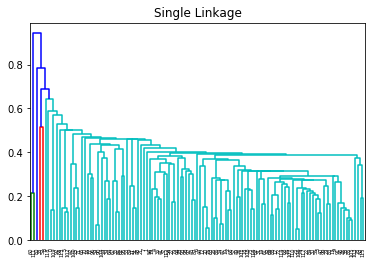

In [55]:
# single linkage
single_merging = linkage(country_df_pca.drop("country", axis=1), method="single", metric="euclidean")
dendrogram(single_merging)
plt.title("Single Linkage")
plt.show()

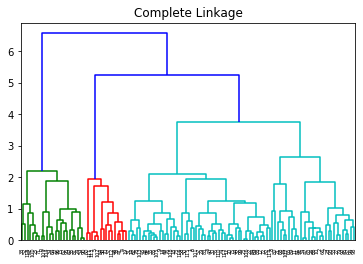

In [56]:
# complete linkage
complete_merging = linkage(country_df_pca.drop("country", axis=1), method="complete", metric="euclidean")
dendrogram(complete_merging)
plt.title("Complete Linkage")
plt.show()

In [57]:
# create three clusters using cuttree module
cluster_labels = cut_tree(complete_merging, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 2, 1, 3, 3, 1, 2, 4, 1, 2, 4, 1, 1, 1, 0, 4, 1, 1, 3, 1, 4,
       1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3, 3, 0, 0, 1, 3, 0, 2,
       1, 1, 1, 2, 3, 1, 1, 4, 0, 2, 3, 1, 3, 1, 1, 0, 3, 1, 0, 2, 0, 4,
       2, 0, 4, 1, 3, 0, 1, 1, 1, 1, 1, 0, 1, 2, 4, 0, 1, 1, 1, 1, 2, 2,
       1, 4, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 3, 1, 0, 1, 1, 4, 1, 0,
       1, 3, 3, 3, 1, 1, 1, 1, 0])

In [58]:
country_df_pca_hei = country_df
country_df_pca_hei = country_df_pca_hei.drop("cluster_id", axis=1)

In [59]:
country_df_pca_hei["cluster_id"] = cluster_labels
country_df_pca_hei.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3


In [60]:
country_df_pca_hei.cluster_id.value_counts()

1    51
0    23
2    20
3    15
4    10
Name: cluster_id, dtype: int64

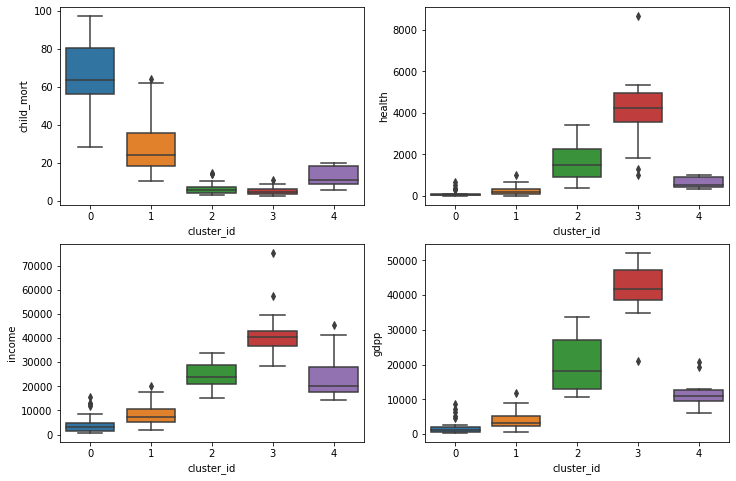

In [61]:
fig=plt.figure(figsize=(12, 8))

plt.subplot(221)
sns.boxplot(x='cluster_id', y='child_mort', data=country_df_pca_hei)
plt.subplot(222)
sns.boxplot(x='cluster_id', y='health', data=country_df_pca_hei)
plt.subplot(223)
sns.boxplot(x='cluster_id', y='income', data=country_df_pca_hei)
plt.subplot(224)
sns.boxplot(x='cluster_id', y='gdpp', data=country_df_pca_hei)
plt.show()

### Observation after Heirarchical clustering:
-  After applying heirarchical clusetring we can see that cluster 0 and cluster 1 has high child mort and low health, income, gdpp 
-  Cluster 4 has almost same values as in K-mean clustring. It has slightly high child mort values as compare to the cluster 2 and 3 and high health, income and gdpp value as compare to the cluster 1 and 0.

In [62]:
cluster_0_kmean = country_df[country_df["cluster_id"] == 0]
cluster_0_hie = country_df_pca_hei[country_df_pca_hei["cluster_id"] == 0]

In [63]:
intersected_df_1 = pd.merge(cluster_0_kmean, cluster_0_hie, how='inner')
len(intersected_df_1)

22

As we see cluster 0 in both clustering techniques has common values

### Final List of countries:
-  Find the cuttoff values of `Child_mort`, `Income`, `gdpp` for final list of countries on which CEO can focus. 
-  We can find cuttof values using clusters we get.

We decide to focus on cluster 0 and cluster 3 in K-mean clustering so based on those clusetr find the cuttoff value of child_mort, gdpp, income, and health<br>
As we see cluster 0 has low critical values so find the cuttoff based on cluser 0

In [64]:
cluster_0_kmean.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0
mean,70.313636,896.083809,137.036527,829.141182,4781.363636,10.888636,62.190909,4.519545,2191.954545,0.0
std,15.789517,1302.483249,181.749508,947.926522,4511.124129,6.379162,3.973832,0.908271,2508.461860,0.0
min,36.900000,23.087800,12.821200,112.306000,700.000000,2.090000,54.300000,2.590000,327.000000,0.0
25%,57.775000,109.158750,39.418850,213.205000,1557.500000,5.690000,59.575000,4.127500,571.000000,0.0
50%,67.900000,245.864500,53.264750,361.242500,3190.000000,9.345000,62.500000,4.605000,1090.000000,0.0
75%,80.825000,1481.850000,87.247500,1307.685000,5012.500000,16.600000,65.450000,4.972500,2425.000000,0.0
max,97.400000,5048.750000,650.832000,3257.550000,15400.000000,23.600000,68.200000,6.150000,8750.000000,0.0


#### We can see that average value from above table 
-  Child mort = 74
-  income = 3540
-  gdpp = 1600


In [66]:
country_df_final = pd.read_csv(r"F:\PGD_UpGrad\Machine_Learning_1\Clustering and PCA Assignment\Data\Country-data.csv")
country_df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [67]:
country_df_final.exports = (country_df_final.exports * country_df_final.gdpp)/100
country_df_final.health = (country_df_final.health * country_df_final.gdpp)/100
country_df_final.imports = (country_df_final.imports * country_df_final.gdpp)/100
country_df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [68]:
country_df_final_list = country_df_final[country_df_final["gdpp"]<=1600]

In [69]:
country_df_final_list = country_df_final_list[country_df_final_list["income"]<=3540]

In [70]:
country_df_final_list = country_df_final_list[country_df_final_list["child_mort"] > 74]

In [71]:
country_df_final_list

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220


In [72]:
len(country_df_final_list)

27

In [73]:
country_df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,109.185185,208.331044,46.809285,324.883741,1713.444444,8.629074,56.970370,5.377407,736.111111
std,30.179383,174.145960,25.250344,230.248324,851.353237,6.259072,7.117844,0.915527,378.874988
min,74.700000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000
25%,89.750000,91.394500,31.512200,170.534000,1110.000000,4.010000,55.300000,5.000000,452.500000
50%,101.000000,133.756000,38.755000,254.560000,1500.000000,6.390000,57.500000,5.310000,595.000000
75%,116.000000,291.190000,53.264750,393.884000,2155.000000,13.150000,60.150000,5.845000,1033.500000
max,208.000000,617.320000,129.870000,1181.700000,3370.000000,20.800000,68.200000,7.490000,1480.000000


In [74]:
country_list = country_df_final_list.country
print(list(country_list))

['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Sierra Leone', 'Sudan', 'Togo', 'Uganda', 'Zambia']


Major focus should be on countries mentioned above